<a href="https://colab.research.google.com/github/cortiz313/Machine-Learning-Class/blob/main/labs/decision_trees_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/decisionTreez2.png)

#### Part of the [Inquiryum Machine Learning Fundamentals Course](http://inquiryum.com/machine-learning/)


In this notebook we are going to look at decision trees. Decision trees are robust machine learning algorithms in their own right, and also are the core component of random forest techniques and XGBoost.

Let's get some important stuff out of the way. Here are the advantages and disadvantages of decision trees:

### advantages

1. When it classifies an instance you can ask *why*. Most machine learning techniques are called **black box models** which means that when it makes a decision you can't go inside and see how that decision was made.  For example, consider a task where we have 100 attributes and we are trying to predict whether someone has a particular kind of cancer. With an algorithm like Naive Bayes, which relies on probabilities, we can't ask "How did you come to the conclusion that this person will have cancer?" In contrast, decision trees can provide an answer to that question. 
2. It requires minimal data wrangling. We don't need to scale columns. It can handle missing data (although, not with the sklearn implementation)
4. Once trained, it is fairly fast at making classifications. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

### disadvantages

1. Susceptible to overfitting the data. The training set is only a sample from some huge real world set (for example, even a training set of 1000 people who do and do not have diabetes, is tiny compared to all the people who do or do not have diabetes). The decision tree algorithm may add branches to the tree that improve performance for the instances in the dataset but decrease performance on the instances outside the dataset. This is the big wart on decision trees.
3. Learning the optimal decision tree is NP-complete. What this means is that the algorithm can create a pretty good classifier in a reasonable amount of time, but to create the very best classifier would take more time than there are grains of sand in the Ganges.


Let's get to a simple example. 

## Iris Dataset yet again

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/irises.png))

Here is a very simple basic example. We are going to use the Iris Dataset we used before.  As a reminder, the data set contains 3 classes of instances:

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica (the picture above)

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance from the values of the attributes.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>Your Work ...</font> 
Just for practice you can help do the following...

## <font color='#EE4C2C'>1. Load the data</font> 



This dataset is so common that it is build into sklearn, but just for practice let's load our own csv file from

    https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv

Setting up environment

In [51]:
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import tree

In [52]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv')
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <font color='#EE4C2C'>2. Divide into features and labels</font> 



In [53]:
iris_features = iris_data[['Petal Length', 'Petal Width', 'Sepal Width', 'Sepal Length']]
iris_labels = iris_data['Class']

## <font color='#EE4C2C'>3. Splitting data into a training set and test set</font> 



### Splitting data into a training set and test set

Let's say we want to 80% of the data in the training set and 20% in the test set. And let us set a random state of 0

In [54]:
iris_features_train, iris_features_test, iris_label_train, iris_label_test = train_test_split(iris_features, iris_labels, random_state=0, train_size=0.8)


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

# Decision trees
### Step 1: Create a decision tree classifier
Now it is time to create a decision tree classifier using entropy:


In [55]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

### Step 2: Train the Classifier on the Training Data:
(the arguments are the same as the knn classifier)


In [56]:
clf.fit(iris_features_train, iris_label_train)

DecisionTreeClassifier(criterion='entropy')

Parsing

```
clf.fit(iris_features_train, iris_label_train)
```

`clf` is our decision tree classifier. `fit` means to train the classifier on the dataset. `iris_features_train` is the DataFrame containing all the feature columns of the training set and `iris_label_train` are the labels of the training set.
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


### Viewing our decision tree

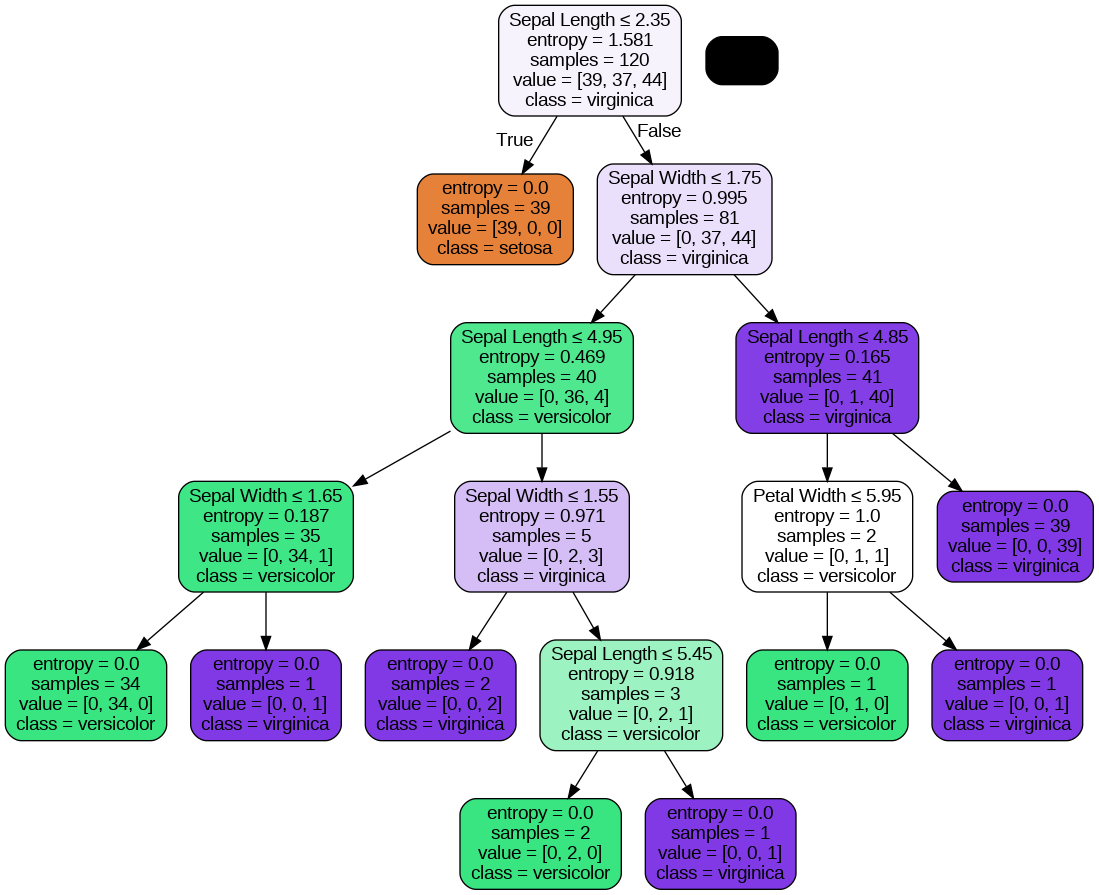

In [57]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="iris.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

Ok. that is cool.

When I did this the first few nodes of the tree looked like:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/tree3.png)

Let's parse that out a bit. The first node looks like:

```
Petal Length <= 2.45
entropy = 1.583
samples=120
values = [37, 41, 42]
class = virginica
```
Let's skip the first line for a moment and look at the lines:

```
samples=120
values = [37, 41, 42]
```
The number of samples is 120. 37 of them are setosa, 41 are versicolor, and 42 are virginica. So if this is all the information you had to guess with, you would select virginica since most of the samples are virginica. That is how we get

```
class = virginica
```
From the samples and values lines we can calculate entropy, or info:

$$
info([37, 41, 42])=-\sum{37\over120}log_2{({37\over120})}+{41\over120}log_2{({41\over120})}+{42\over120}log_2{({42\over120})} = 1.583
$$

So the entropy of the node is 1.583.  

To recap, we examined all the lines of


```
Petal Length <= 2.45
entropy = 1.583
samples=120
values = [37, 41, 42]
class = virginica
```
except the first.

The first line contains the first question: *Is the petal length smaller or equal to 2.45*. If that is true we follow the left link to the node:

```
entropy=0.0
samples=37
values=[37,0,0]
class = setosa
```

It turns out that 37 of the samples have a petal length less than or equal to 2.45 and all of them are setosa. If we get a new sample and its petal length is 2.37, we would classify it as setosa. 
Let's examine the node on the right:

```
Petal Length <= 1.75
entropy= 1.0
samples= 83
values=[0, 41, 42]
class = virginica
```
It turns out that 83 of the samples have a petal length greater than 2.45 (we are following the 'no' link from the root node) 

Look over the nodes of the tree you constructed to gain a good understanding of what a decision tree looks like.

That was a bit of a diversion (although, an important one).
![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

## A Recap
#### step 1. we created a classifier

```
clf = tree.DecisionTreeClassifier(criterion='entropy')
```
#### step 2. we trained the classifier on the data
```
clf.fit(iris_features_train, iris_label_train)
```
We are fitting a classifier that uses the columns Sepal Length, Sepal Width, Petal Length, and Petal Width to predict Class.

#### step 3. use the classifier to classifier instances from out test set.
Once we fit our classifier to the data (i.e. we trained it) we can use the classifier to classifier samples. let's try it on the test set:


In [58]:
iris_predictions = clf.predict(iris_features_test)
from sklearn.metrics import accuracy_score
accuracy_score(iris_label_test, iris_predictions)


1.0

Great! You should get 100% or near 100% accuracy on that small dataset.

### Adjusting Max Depth

The depth of a decision tree is how many rows of nodes there are excluding the root node. In the case of the tree above, the depth was likely to be 5. 

We can limit depth by using the `max_depth` parameter when we construct our DecisionTreeClassifier.

Let's try it with a max depth of 4 (notice in the first line of code we added `max_depth=4`)

In [59]:
clf_maxdepth4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_maxdepth4.fit(iris_features_train, iris_label_train)
iris_predictions = clf_maxdepth4.predict(iris_features_test)
accuracy_score(iris_label_test, iris_predictions)

1.0

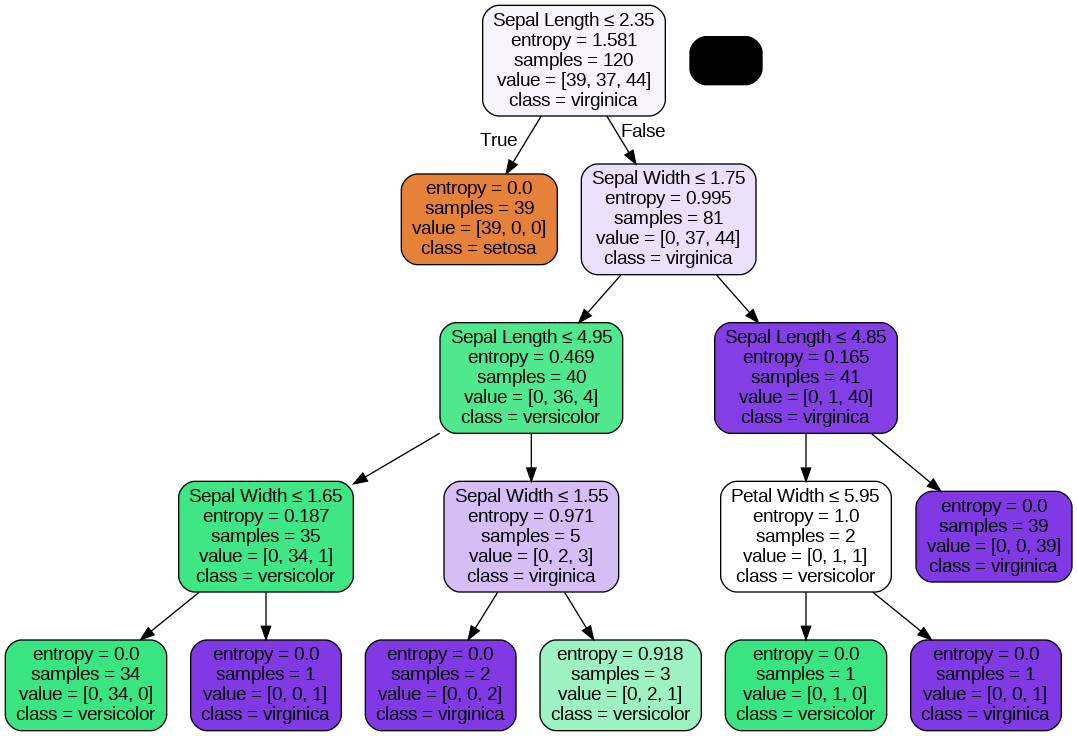

In [60]:
dot_data = tree.export_graphviz(clf_maxdepth4, out_file="iris4.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris4.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

I already mentioned that a negative of decision trees are that they may overfit the training data.  If we allow for unbounded depth the risk of overfitting greatly increases. We can reduce the risk of overfitting by limiting the depth as we just did.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)


# <font color='#EE4C2C'>You Try ...</font> 

## <font color='#EE4C2C'>1. Pima Indian Diabetes Dataset</font> 


The Pima Indians Diabetes Data Set was developed by the
United States National Institute of Diabetes and Digestive and Kidney Diseases. 

![](https://upload.wikimedia.org/wikipedia/commons/6/65/Pinal_County_Arizona_Incorporated_and_Unincorporated_areas_GRIC_highlighted.svg)

Astonishingly, over 30% of Pima people develop diabetes. In contrast, the diabetes rate in
the United States is 8.3% and in China it is 4.2%.

Each instance in the dataset represents information about a Pima woman over the age of 21
and belonged to one of two classes: a person who developed diabetes within five years, or a
person that did not. There are eight attributes in addition to the column representing whether or not they developed diabetes:


1.  The number of times the woman was pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3.  Diastolic blood pressure (mm Hg)
4.  Triceps skin fold thickness (mm) 
5.  2-Hour serum insulin (mu U/ml) 
6.  Body mass index (weight in kg/(height in m)^2) 
7.  Diabetes pedigree function 
8.  Age
9.  Whether they got diabetes or not (0 = no, 1 = yes)

We are trying to predict whether they got diabetes or not based on the  features.

The csv file at  is at

    https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv
    
<span style="color:red">This file does not have a header row</span>

You will need to 

1. load the file into a dataframe
2. divide the data into training and test sets. (an 80-20 split sounds good)
3. train a decision tree classifier on the training data 
3. display the tree
3. run the classifier on the test data
4. compute the accuracy
5. Have a small paragraph describing the results.

Good luck!

Setting up the environment

In [61]:
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import tree

Load the data and add column names

In [62]:
column_names = ['Number of Pregnancies', 'Plasma Glucose', 'Diastolic Blood Pressure', 'Tricep Skin Fold Thickness',
                'Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Diabetes?']
pima_data = pd.read_csv('https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv', names=column_names)
pima_data[:10]

,Number of Pregnancies,Plasma Glucose,Diastolic Blood Pressure,Tricep Skin Fold Thickness,Serum Insulin,BMI,Diabetes Pedigree Function,Age,Diabetes?
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Divide into training and test sets

In [63]:
pima_features = pima_data[['Number of Pregnancies', 'Plasma Glucose', 'Diastolic Blood Pressure', 'Tricep Skin Fold Thickness',
                'Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']]
pima_labels = pima_data['Diabetes?']

pima_train_features, pima_test_features, pima_train_labels, pima_test_labels = train_test_split(pima_features, pima_labels, random_state=0, train_size=0.8)

Training the Decision Tree Classifier

In [71]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(pima_train_features, pima_train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Display the Tree

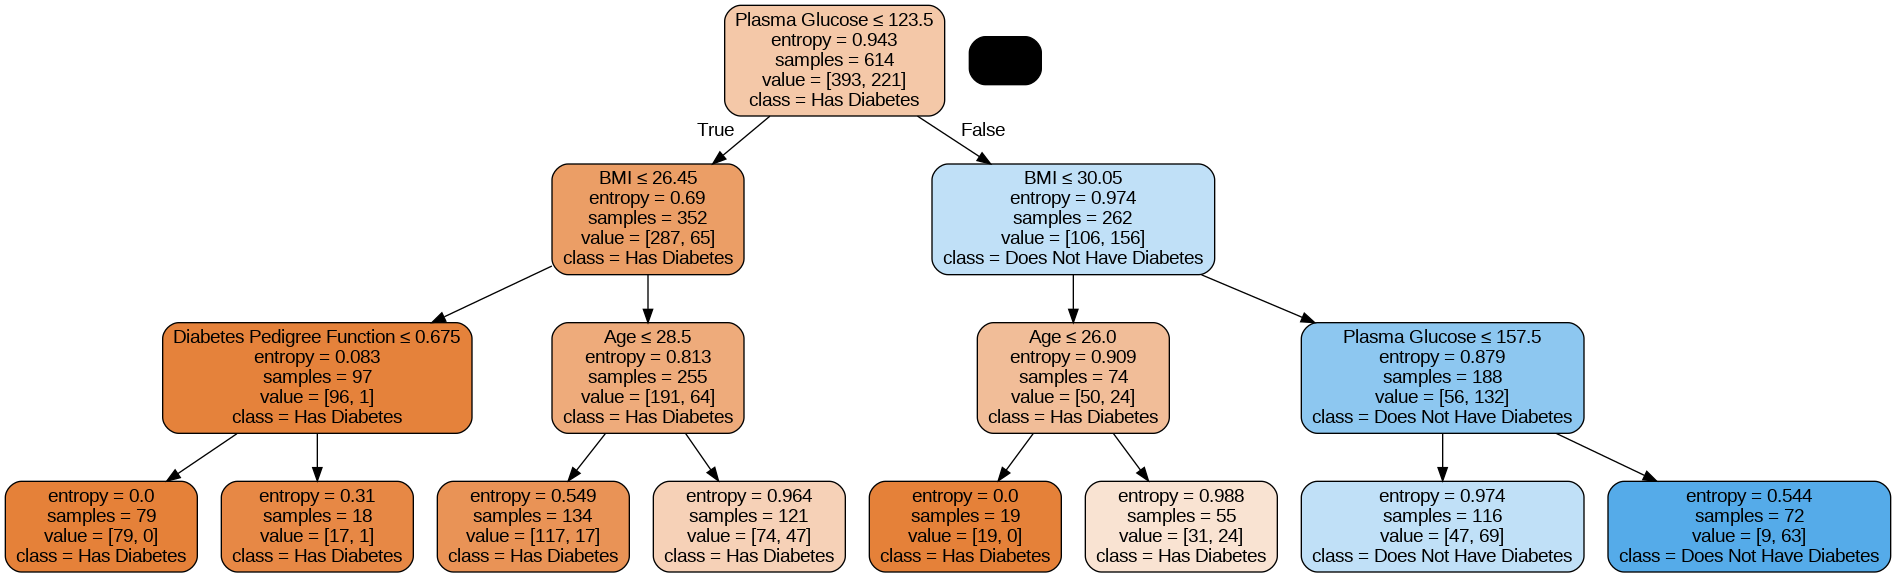

In [72]:
dot_data = tree.export_graphviz(clf, out_file="pima.dot", 
                         feature_names=['Number of Pregnancies', 'Plasma Glucose', 'Diastolic Blood Pressure', 'Tricep Skin Fold Thickness',
                'Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age'],  
                         class_names=['Has Diabetes', 'Does Not Have Diabetes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("pima.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Run Classifier on Test Data

In [73]:
pima_predictions = clf.predict(pima_test_features)

Compute the Accuracy Score

In [74]:
accuracy_score(pima_test_labels, pima_predictions)
# Max Depths
# None = 71.4 %
# 1 = 72.1 %
# 2 = 76 %
# 3 = 76 %
# 4 = 74 %
# 5 = 74 %
# 6 = 73.4 %
# 7 = 70.8 %
# 8 = 72.7 %
# 9 = 74 %
# 10 = 68.8 %
# 20 = 75.3 %, then 73.4%
# For some depths, I noticed when I ran it again with the same max depth, I got different accuracy scores. But the most consistent and highest were depths of 2 and 3

0.7597402597402597

## Describing the Results

I ran this experiment many times to get a good idea of what was happening and how the decision tree was working. To start, I want to point out that I was never able to achieve a 100% accuracy score with my predictions, which makes sense because when it comes to diseases of the human body, there are always outliers and proofs to the contrary. An example of this would be a person who smokes their entire life and does not get lung cancer, or someone who doesn't smoke and does get it. However, I found that none of my tests led me to an accuracy score above 76%, so perhaps the features of this data are not the best for predicting diabetes, or maybe another classifying method would achieve better results.
<br>
<br>
Nevertheless, I began by running my predictions against a decision tree with no maximum depth, (which was also hard to look at when I displayed it because of how big it was) and I found an accuracy score of 71.4%, which was decent, but I wanted to see if setting a max depth would improve it as discussed in the lab. I began with testing a max depth of 1 and went all the way to 10, and then tested 20.
<br>
<br>
From 1-10, I found that the optimum depth was actually a tie between 2 and 3, which both shared an accuracy of 76%. Anything less than 2 or greater than 3 actually produced a lower accuracy, presumably for the same overfitting issue outlined previously. The actual percentages can be seen in the code block above. Also it is worth mentioning that for some depths, when I ran the same prediction at the same depth, it would produce a different accuracy percentage. This was not the situation in every case though, as for depths of 2 and 3 I found the accuracy to be consistent. I am not sure why this is the case, but it is interesting. Overall, it seems like a decision tree with a max depth of 2 or 3 is optimal in this case for predicting and classifying this data.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. The Wisconsin Cancer Datasett</font> 

The task is to predict whether a tumor is malignant or benign (the second column of the  dataset based on 30 real values. 

The data file is


https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.data


And a writeup about the data is at:

https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.names

Follow the same steps as above.

Setting up the environment

In [75]:
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn import tree
from IPython.display import Image
import pydotplus

Load data and add column names

In [77]:
# I only need columns 1-12, because I am only using the mean value of each feature, not the rest of the data

# Here I give each column a name of 1-32, so I can then drop columns 13-32
cols = list(range(1,33))
wisconsin_data = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/wdbc.data', names=cols)
wisconsin_data.drop(wisconsin_data.loc[:, 13:32], inplace=True, axis=1)

# Here I rename the remaining cols appropriately
wisconsin_data.rename(columns={1:'ID', 2:'Diagnosis', 3:'Mean Radius',4:'Mean Texture',5:'Mean Perimeter',6:'Mean Area',7:'Mean Smoothness',8:'Mean Compactness',9:'Mean Concavity',10:'Mean Concave Points',11:'Mean Symmetry',12:'Mean Fractal Dimension'}, inplace=True)
wisconsin_data[:10]

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


Divide into training and test sets

In [79]:
wisconsin_features = wisconsin_data[['ID','Mean Radius','Mean Texture','Mean Perimeter','Mean Area','Mean Smoothness','Mean Compactness','Mean Concavity','Mean Concave Points','Mean Symmetry','Mean Fractal Dimension']]
wisconsin_labels = wisconsin_data['Diagnosis']

wis_train_features, wis_test_features, wis_train_labels, wis_test_labels = train_test_split(wisconsin_features, wisconsin_labels, random_state=0, train_size=0.8)

Train the Decision Tree Classifier

In [80]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7) # After testing I found this value for max depth to be the best
clf.fit(wis_train_features, wis_train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

Display the Tree

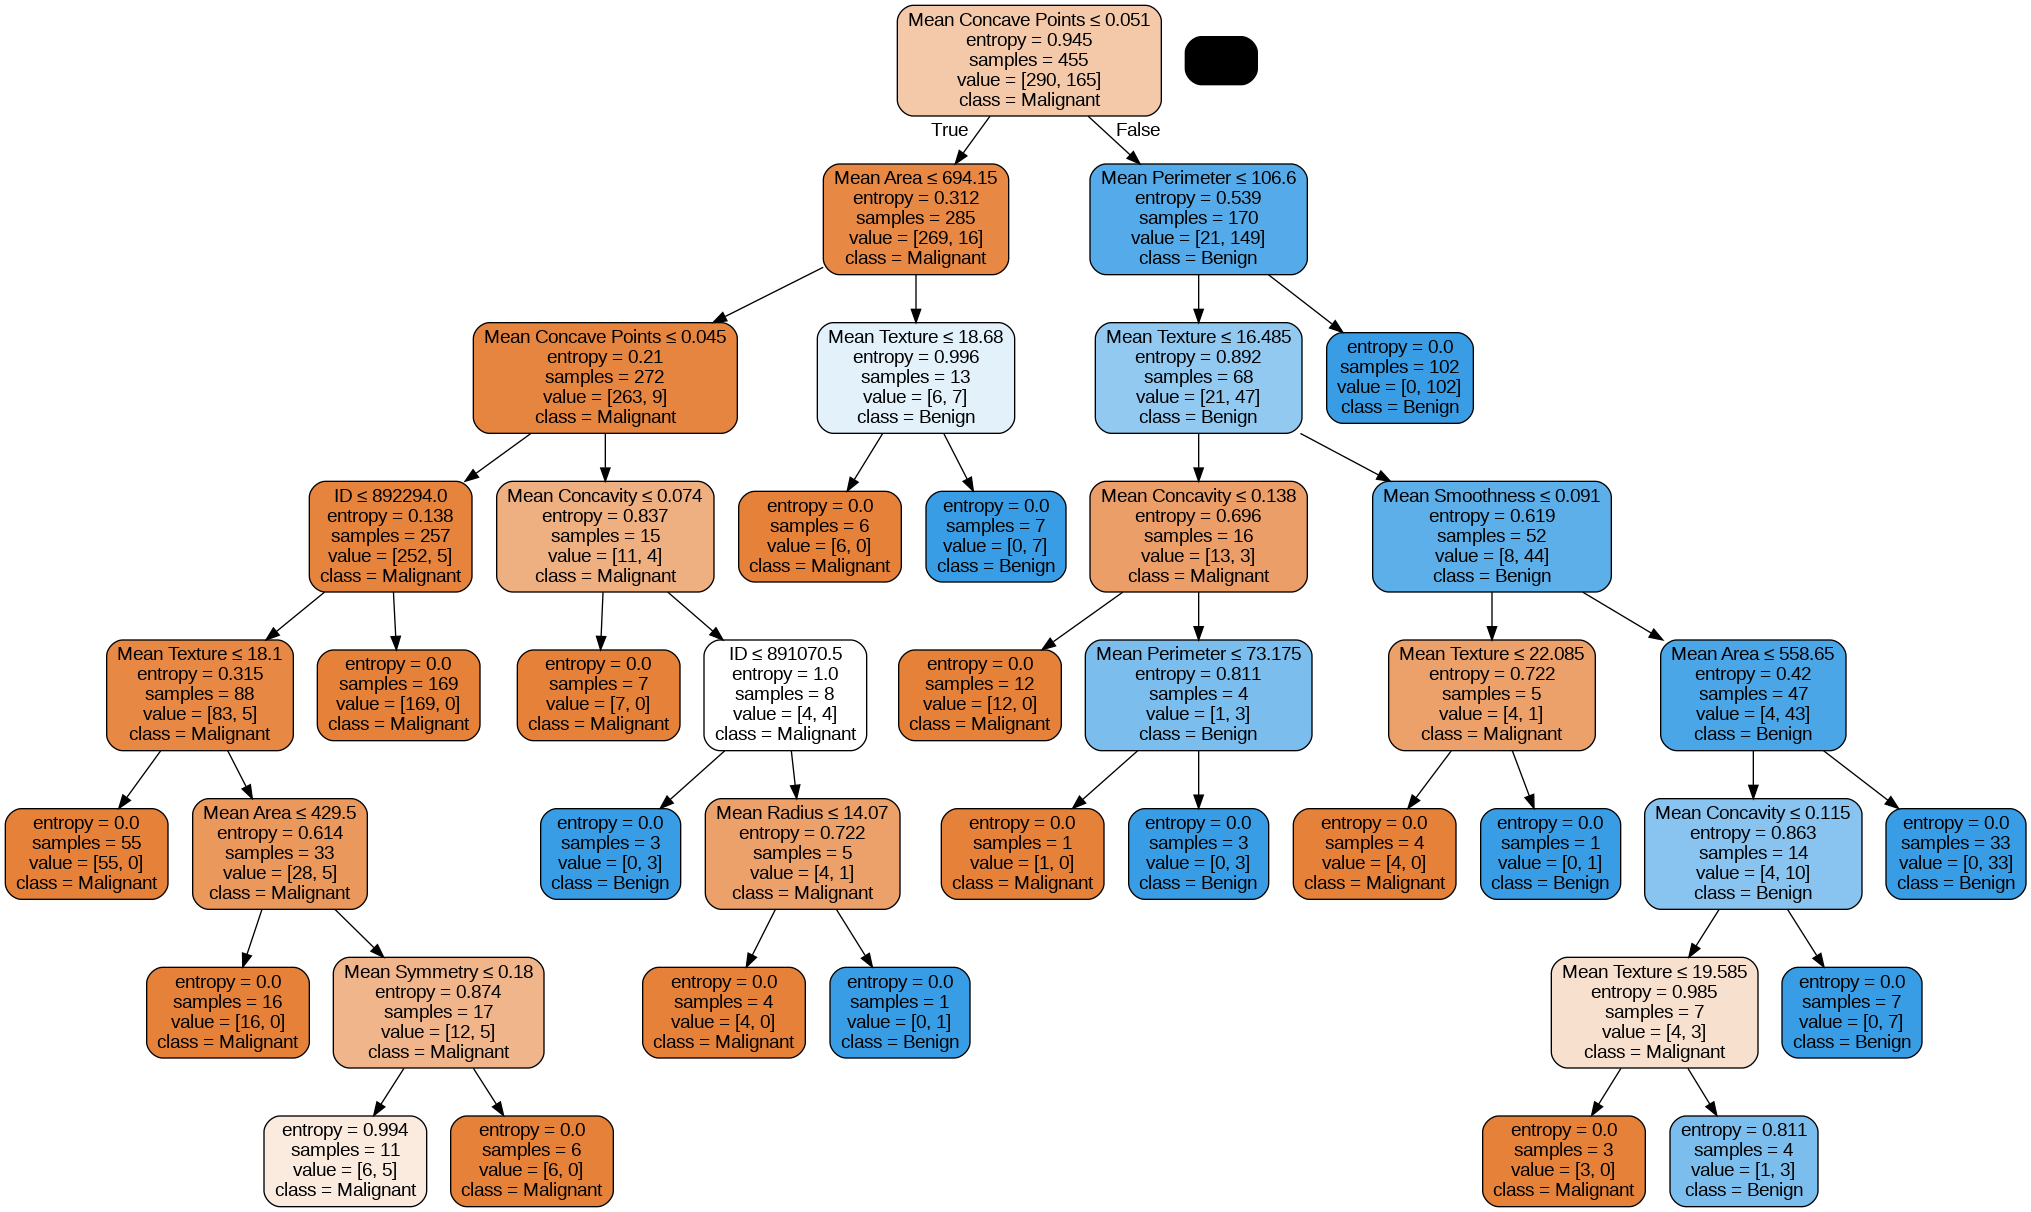

In [81]:
dot_data = tree.export_graphviz(clf, out_file="wis.dot", 
                                feature_names=['ID','Mean Radius','Mean Texture','Mean Perimeter','Mean Area','Mean Smoothness','Mean Compactness','Mean Concavity','Mean Concave Points','Mean Symmetry','Mean Fractal Dimension'],
                                class_names=['Malignant', 'Benign'],
                                filled=True, rounded= True,
                                special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("wis.dot")
Image(graph.create_png())

Run the Classifier on Test Data

In [82]:
wispredictions = clf.predict(wis_test_features)

Compute the Accuracy

In [83]:
accuracy_score(wis_test_labels, wispredictions)

# Accuracy Scores
# Max Depth
# None = 92.1%
# 1 = 90.4%
# 2 = 93%
# 3 = 93.9%
# 4 = 93.9%
# 5 = 93.9%
# 6 = 93%
# 7 = 94.7%, next test 95.6%
# 8 = 92.1%
# 9 = 93.9%
# 10 = 93%
# 20 = 91.2% 

0.956140350877193

### Describing Results

I did the same thing with this exercise as I did with the previous one. After building a working classifier, I observed my results with different maximum depths. Without a limit on the depth, I found the accuracy score to be 92.1%, which was highly accurate, but for fear of overfitting the data I performed the subsequent tests. I found the depth with the highest accuracy score to be 7, which produced 94.7% accuracy on my first test and 95.6% accuracy on my second test. Performing these tests has actually brought an interesting question to my mind, I wonder how the number of features of a dataset might correspond to the ideal maximum depth? That is something I'll have to research. At any rate, as we can see the decision tree algorithm is highly accurate as a classifier for this dataset.